<a href="https://colab.research.google.com/github/HuangruiChu/MIMIC-III-Breast-Cancer-study/blob/main/MIMIC_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center' ><font size='5'>
BIS 638 (FA22): Clinical Database Management Systems and Ontologies Final Project
</font></div>

<div align='center' ><font size='6'>
Breast Cancer Analysis based on MIMIC III
</font></div>

<div align='center' ><font size='4'>
Group Name: Infinite Justice

Group Member：Huangrui Chu, Yaoqi Li, Kuankuan Sun, Mingrui Wang

Yale Univserity School of Public Health
</font></div>


# **1. Introduction**

*This project for Yale Course BIS 638: Clinical Database Management Systems and Ontologies Final Project*

## 1.1 Background
- 请简介一下 breast cancer

<br/>

## 1.2 Research Questions
- 放上我们的research question

<br/>

## 1.3 Data Sources

The data comes from [MIMIC-III](https://physionet.org/content/mimiciii/1.4/), which is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. The database includes information such as demographics, vital sign measurements made at the bedside (~1 data point per hour), laboratory test results, procedures, medications, caregiver notes, imaging reports, and mortality (including post-hospital discharge).

MIMIC supports a diverse range of analytic studies spanning epidemiology, clinical decision-rule improvement, and electronic tool development. It is notable for three factors: it is freely available to researchers worldwide; it encompasses a diverse and very large population of ICU patients; and it contains highly granular data, including vital signs, laboratory results, and medications.
  
  
  摘自 abstract 大家可以paraphrase 一下

<div  align="center"> 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeV6ahtZ6-POUjabTbHU973fbwmNAqleU5ag&usqp=CAU" width = "100" alt="img" />
</div>


  - To access MIMIC-III, our group have finished [CITI Training for Data or Specimens Only Research](https://www.citiprogram.org/verify/?wf27bcd4b-1305-43f1-a4f9-16549df886fa-51130798). The certifications are shown below.

<div  align="center"> 

<img src="https://raw.githubusercontent.com/HuangruiChu/MIMIC-III-Breast-Cancer-study/main/CITI_certification_Huangrui_Chu.png" width = "300" alt="img" />
<img src="https://raw.githubusercontent.com/HuangruiChu/MIMIC-III-Breast-Cancer-study/main/CITI_certification_Mingrui_Huang.png" width = "300" alt="img" />
<img src="https://raw.githubusercontent.com/HuangruiChu/MIMIC-III-Breast-Cancer-study/main/CITI_certification_Yaoqi_Li.jpg" width = "300" alt="img" />
<img src="https://raw.githubusercontent.com/HuangruiChu/MIMIC-III-Breast-Cancer-study/main/CITI_certification_Kuankuan_Sun.png" width = "300" alt="img" />
</div>

Data files have be downloaded and saved in google drive, and will be loaded into google colab. The data are for research study only and we would not upload them to github.

<br/>

## 1.4 Methods 
<!-- <br/>
<img src="https://mark.trademarkia.com/logo-images/epoint-sa/vertabelo-86225942.jpg" height = "50" alt="img" />
<img src="https://d1.awsstatic.com/asset-repository/products/amazon-rds/1024px-MySQL.ff87215b43fd7292af172e2a5d9b844217262571.png" height = "50" alt="img" />
<img src="https://miro.medium.com/max/776/1*Lad06lrjlU9UZgSTHUoyfA.png" height = "50" alt="img" />
<img src="https://www.ebi.ac.uk/ols/img/OLS_logo_2017.png" height = "50" alt="img" />

<br/>

- Use [Vertabelo Database Modeler](https://vertabelo.com/) to design an ER model, then generate a MySQL script.
- Use google colab to install MySQL, read in SQL script and create a database with MIMIC III data.
- Use [OLS](https://www.ebi.ac.uk/ols/index) as an ontology resource, link the disease terms in Disease Ontology to the patient data representation (icd9_code). -->  
大概也要paraphrase




# **2. Database Construction** 

## 2.1 Coding Environment Preparation

- Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


- Require libraries

In [ ]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 2.2 Data Resource

- The data files we will use include:
  - `PATIENTS`: Defines each SUBJECT_ID in the database, i.e. defines a single patient
  - `ADMISSIONS`: Define a patient’s hospital admission, HADM_ID
  - `DIAGNOSES_ICD`: Contains ICD diagnoses for patients, most notably ICD-9 diagnoses
  - `D_ICD_DIAGNOSES`: Definition table for ICD diagnoses
  - `ICUSTAYS`: Defines each ICUSTAY_ID in the database, i.e. defines a single ICU stay
  - `PRESCRIPTIONS`: Contains medication related order entries, i.e. prescriptions

- We Create an ER model with Vertabelo for our project

我们自己也要做一个吗？
做一个呗！

  - The whole MIMIC Schema and Entity-Relationship (ER) Diagram can be seen via this [link](https://mit-lcp.github.io/mimic-schema-spy/)

- Write Python code with embedded SQL to create database, tables and query the tables


In [ ]:
""" create a database connection to a database that resides
    in the drive
"""
conn = None;

#conn = sqlite3.connect(':memory:')
#replace the following file path with your own
conn = sqlite3.connect('/content/gdrive/MyDrive/BIS638/2022/mimic_labdata.db')

cursor = conn.cursor()
#Doping tables if already exists.
cursor.execute("DROP TABLE IF EXISTS Patients")
cursor.execute("DROP TABLE IF EXISTS Admissions")
cursor.execute("DROP TABLE IF EXISTS Diagnoses_icd")
cursor.execute("DROP TABLE IF EXISTS D_icd_diagnoses")
#Creating tables
# The meaning of these variables can be seen here https://mit-lcp.github.io/mimic-schema-spy/tables/patients.html
sql ='''CREATE TABLE Patients (
  row_id int  NOT NULL,
  subject_id int  NOT NULL,
  gender varchar(5)  NOT NULL,
  dob datetime  NOT NULL,
  dod datetime  NOT NULL,
  dod_hosp datetime  NULL,
  dod_ssn datetime  NULL,
  expire_flag varchar(5)  NOT NULL,
  PRIMARY KEY (subject_id)
);'''
cursor.execute(sql)
sql ='''CREATE TABLE Admissions (
  row_id int  NOT NULL,
  subject_id int  NOT NULL,
  hadm_id int  NOT NULL,
  admittime datetime  NOT NULL,
  dischtime datetime  NOT NULL,
  deathtime datetime   NULL,
  admission_type varchar(50)  NOT NULL,
  admission_location varchar(50)  NOT NULL,
  discharge_location varchar(50)  NOT NULL,
  insurance varchar(255)  NOT NULL,
  language varchar(10)   NULL,
  religion varchar(50)   NULL,
  marital_status varchar(50)   NULL,
  ethnicity varchar(200)  NOT NULL,
  edregtime datetime   NULL,
  edouttime datetime   NULL,
  diagnosis varchar(300)  NOT NULL,
  hospital_expire_flag int  NOT NULL,
  has_chartevents_data int  NOT NULL,
  PRIMARY KEY (hadm_id),
  FOREIGN KEY (subject_id) REFERENCES Patients(subject_id)
);'''
cursor.execute(sql)
#insert code to create D_icd_diagnoses table
sql ='''CREATE TABLE D_icd_diagnoses (
      row_id int  NOT NULL,
      icd9_code varchar(10)	  NOT NULL,
      short_title varchar(50)  NOT NULL,
      long_title varchar(255)   NOT NULL,
      PRIMARY KEY (icd9_code)
  );'''
cursor.execute(sql)

#insert code to create Diagnoses_icd table
sql ='''CREATE TABLE Diagnoses_icd (
      row_id int  NOT NULL,
      subject_id	int NOT NULL,
      hadm_id	int NOT NULL,
      seq_num	int NULL,
      icd9_code	varchar(10) NULL,
      FOREIGN KEY (subject_id) REFERENCES patients(subject_id),
      FOREIGN KEY (hadm_id) REFERENCES admissions(hadm_id),
      FOREIGN KEY (icd9_code) REFERENCES d_icd_diagnoses(icd9_code)
  );'''
cursor.execute(sql)

print("Table(s) created successfully........")
conn.commit()

#load the data from the MIMIC DEMO URL
patients = pd.read_csv('/content/gdrive/MyDrive/BIS638/2022/PATIENTS.csv')
admissions = pd.read_csv('/content/gdrive/MyDrive/BIS638/2022/ADMISSIONS.csv')

#insert code to load D_ICD_DIAGNOSES.csv and DIAGNOSES_ICD.csv into the corresponding Pandas DataFrame objects
d_icd_diagnoses = pd.read_csv('/content/gdrive/MyDrive/BIS638/2022//D_ICD_DIAGNOSES.csv')
diagnoses_icd = pd.read_csv('/content/gdrive/MyDrive/BIS638/2022/DIAGNOSES_ICD.csv')



#write the data to a sqlite table
patients.to_sql('Patients', conn, if_exists='replace', index = False)
admissions.to_sql('Admissions', conn, if_exists='replace', index = False)

#insert code to write data to D_icd_diagnoses and Diagnoses_icd tables 
d_icd_diagnoses.to_sql('D_icd_diagnoses', conn, if_exists='replace', index = False)
diagnoses_icd.to_sql('Diagnoses_icd', conn, if_exists='replace', index = False)

#Commit your changes in the database
conn.commit()

Table(s) created successfully........


## 2.3 Breast Cancer Patients

We want to extract information that only contains breast cancer patients.

First, we need to know what `icd9_code` represents breat cancer.Therefore, we refer to the [National Libaray of Medicine](https://www.ncbi.nlm.nih.gov/books/NBK367629/table/sb201.t4/) to get the ICD-9-CM diagnosis codes for defining breast cancer.

In [ ]:
get_breast_cancer_titles='''SELECT icd9_code,short_title,long_title FROM D_ICD_DIAGNOSES 
WHERE icd9_code IN ("2330", "1740", "1741", "1742", "1743", "1744", "1745", "1746", "1748", "1749");'''
Breast_cancer_titles = pd.read_sql(get_breast_cancer_titles, conn)
display(Breast_cancer_titles)

,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,1740,Malig neo nipple,Malignant neoplasm of nipple and areola of fem...
1,1741,Mal neo breast-central,Malignant neoplasm of central portion of femal...
2,1742,Mal neo breast up-inner,Malignant neoplasm of upper-inner quadrant of ...
3,1743,Mal neo breast low-inner,Malignant neoplasm of lower-inner quadrant of ...
4,1744,Mal neo breast up-outer,Malignant neoplasm of upper-outer quadrant of ...
5,1745,Mal neo breast low-outer,Malignant neoplasm of lower-outer quadrant of ...
6,1746,Mal neo breast-axillary,Malignant neoplasm of axillary tail of female ...
7,1748,Malign neopl breast NEC,Malignant neoplasm of other specified sites of...
8,1749,Malign neopl breast NOS,"Malignant neoplasm of breast (female), unspeci..."
9,2330,Ca in situ breast,Carcinoma in situ of breast


Extract the breast cancer patients with all the relative information

In [ ]:
cursor.execute("DROP TABLE IF EXISTS Breast_cancer")
extract_breast_cancer_patient='''
CREATE TABLE IF NOT EXISTS Breast_cancer AS
  SELECT p.*,b.short_title, d.icd9_code
  FROM Patients p 
  inner join Diagnoses_icd d on d.subject_id=p.subject_id  
  inner join D_icd_diagnoses b on d.icd9_code=b.icd9_code 
  WHERE b.icd9_code IN ("2330", "1740", "1741", "1742", "1743", "1744", "1745", "1746", "1748", "1749")
  ORDER BY p.subject_id
  '''
cursor.execute(extract_breast_cancer_patient)

we notice that some date seem to be in the future. We think of it as the deidentification. Therefore, we can still make use of the data to get the age of the patientes at each time spot.

In [ ]:
sql='''SELECT COUNT(DISTINCT b.subject_id) AS ovarian_cancer_subject, COUNT(DISTINCT a.hadm_id) AS ovarian_cancer_admission 
  FROM Breast_cancer b
  inner join Admissions a on a.subject_id=b.subject_id  
  ;'''
breast_cancer_countdata = pd.read_sql(sql, conn)
display(breast_cancer_countdata)

,ovarian_cancer_subject,ovarian_cancer_admission
0,144,200


There are in total 153 patients in MIMIC3 database who had breast cancer

思考 为什么只用patient的数据的时候是153 而引入admission之后就只剩144了

# 3. Exploratory Data Analysis



## 3.1 Age distribution 

We want to know the age distribution of breast cancer patients (when visiting hospitals, diagnosed, dead) V.S International organization’s recommendation for women health check and breast cancer high-occurrence age.

注意 CHR 这边把 admission的时间算做diagnosed的时间 因为CHR 没有发现 门诊时间。。。

并且，CHR 认为 patient 那边记录的死亡时间会稍微准确些。就不区分 医院提供的死亡时间，社会死亡时间啥的了

In [ ]:
get_death_age='''SELECT distinct subject_id, (dod-dob) as expire_age
FROM Breast_cancer
where expire_flag = 1'''
breast_cancer_death_agedata = pd.read_sql(get_death_age, conn)
get_diagnosis_age='''SELECT distinct b.subject_id, (a.admittime-b.dob) as diagnosis_age, JULIANDAY(a.dischtime) - JULIANDAY(a.admittime) as in_hospital_days
FROM Breast_cancer b
inner join Admissions a on a.subject_id == b.subject_id '''
breast_cancer_diagnosis_agedata = pd.read_sql(get_diagnosis_age, conn)
display(breast_cancer_diagnosis_agedata)

,SUBJECT_ID,diagnosis_age,in_hospital_days
0,2297,49,9.718056
1,2693,42,3.024306
2,2984,56,14.736111
3,2984,59,5.186806
4,2984,60,5.465278
...,...,...,...
195,96453,56,1.868750
196,99268,59,4.686806
197,99268,61,7.421528
198,99268,61,10.815278


We notice from below that the largest age of the peolpe who died is 300 which is curently impossible.

In [ ]:
breast_cancer_diagnosis_agedata["diagnosis_age"].describe()

count    200.000000
mean      61.965000
std       32.258749
min       25.000000
25%       48.000000
50%       56.000000
75%       67.000000
max      300.000000
Name: diagnosis_age, dtype: float64

In [ ]:
breast_cancer_diagnosis_agedata["in_hospital_days"].describe()

count    200.000000
mean       8.759226
std        9.196254
min        0.138889
25%        4.151736
50%        5.821528
75%       10.285937
max       85.744444
Name: in_hospital_days, dtype: float64

In [ ]:
breast_cancer_death_agedata['expire_age'].describe()

count     68.000000
mean      67.823529
std       42.948404
min       25.000000
25%       51.000000
50%       59.500000
75%       70.500000
max      301.000000
Name: expire_age, dtype: float64

Therefore, we filter out the data with the age less than 100 and then plot the histogram.

In [ ]:
def plot_histogram(data,name):
  plt.figure(dpi=100)
  plt.hist(data, bins = 12, color = 'steelblue', edgecolor = 'k')
  plt.title(name)
  plt.show()


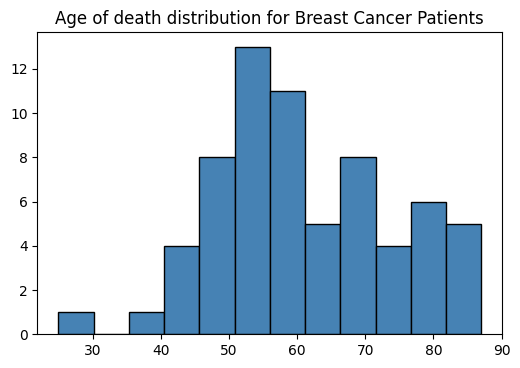

In [ ]:
death_ages=breast_cancer_death_agedata['expire_age']
death_ages=death_ages[death_ages<100]
data=death_ages
name='Age of death distribution for Breast Cancer Patients'
plot_histogram(data,name)

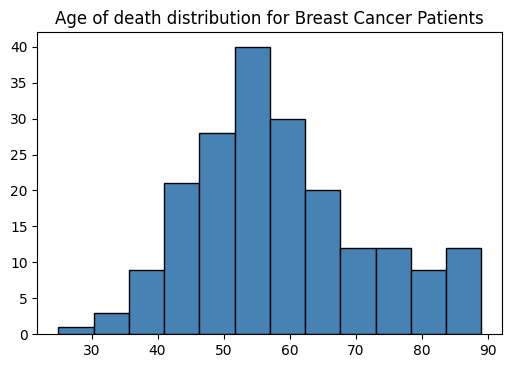

In [ ]:
diagnosis_ages=breast_cancer_diagnosis_agedata['diagnosis_age']
diagnosis_ages=diagnosis_ages[diagnosis_ages<100]
data=diagnosis_ages
name='Age of death distribution for Breast Cancer Patients'
plot_histogram(data,name)

Then, we want to know the average age of those who died. 

In [ ]:
np.average(diagnosis_ages)

58.34010152284264

## 3.2 Time of treatment 

We want to know the age distribution of breast cancer patients (when visiting hospitals, diagnosed, dead) V.S International organization’s recommendation for women health check and breast cancer high-occurrence age.

Time of treatment
这里只是住院时间 可能死了 也可能活着出去了

<Figure size 600x400 with 0 Axes>

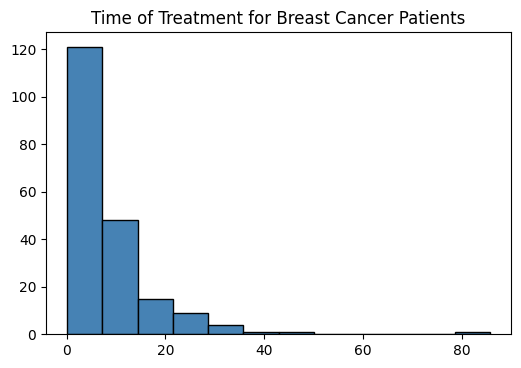

In [ ]:
plt.figure(dpi=100)
data=breast_cancer_diagnosis_agedata['in_hospital_days']
name='Time of Treatment for Breast Cancer Patients'
plot_histogram(data,name)

## 3.3 Survival ratio (survived V.S dead)

We want to learn about the survival ratio (survived V.S dead) of breast cancer.

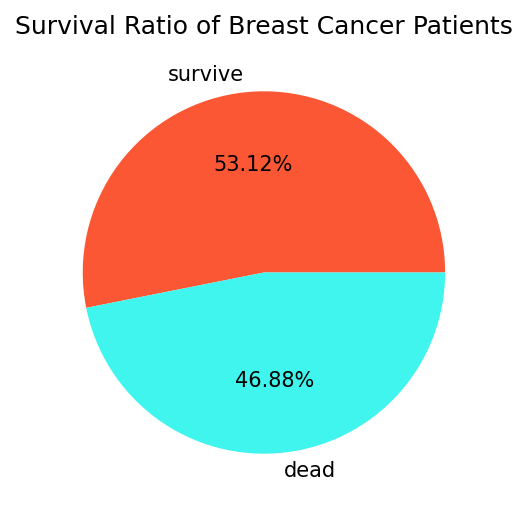

In [ ]:
sql_statement = "SELECT expire_flag FROM Breast_cancer"
cursor.execute(sql_statement)
dbresult = cursor.fetchall()
death_indicator = []
for r in dbresult:
  death_indicator.append(r[0])

# print(death_indicator)
survive = death_indicator.count(0)
death = death_indicator.count(1)
data=[survive, death]
labels = ['survive', 'dead']
colors=["#FB5734", "#3FF5ED"]
name='Survival Ratio of Breast Cancer Patients'
def plot_pie(data,labels,colors,name):
  plt.figure(dpi=150)
  plt.pie(data, labels = labels, colors=colors, autopct = '%1.2f%%')
  plt.title(name)
  plt.show()
plot_pie(data,labels,colors,name)

## 3.4 Male Female ratio (male V.S female)

In [ ]:
sql_statement = "SELECT gender FROM Breast_cancer"
cursor.execute(sql_statement)
dbresult = cursor.fetchall()

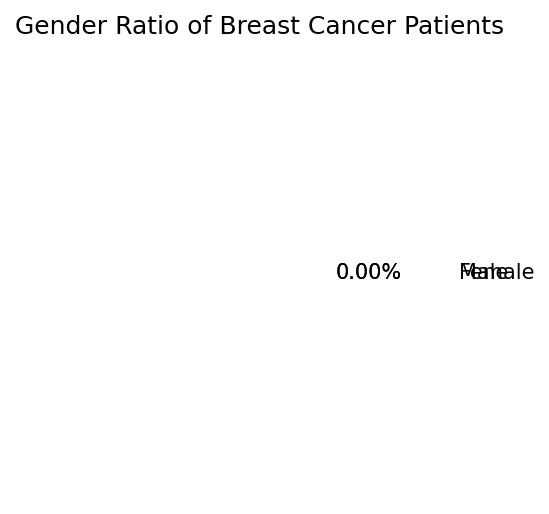

In [ ]:
gender_indicator = []
for r in dbresult:
  gender_indicator.append(r[0])

male = gender_indicator.count("F")
female = death_indicator.count("M")
data=[male, female]
labels = ['Male', 'Female']
colors=["#FB5734", "#3FF5ED"]
name='Gender Ratio of Breast Cancer Patients'

plot_pie(data,labels,colors,name)

# 4. Ontology


In [ ]:
pip install py2neo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 5.0 MB/s 


In [ ]:
https://blog.csdn.net/yueru2wan/article/details/126262514

ModuleNotFoundError: ignored

End the connection

In [ ]:
if conn:
  conn.close()

# 5. Reference & Acknowlegement

- Johnson, A., Pollard, T., & Mark, R. (2016). MIMIC-III Clinical Database (version 1.4). PhysioNet. https://doi.org/10.13026/C2XW26.

- Johnson, A. E. W., Pollard, T. J., Shen, L., Lehman, L. H., Feng, M., Ghassemi, M., Moody, B., Szolovits, P., Celi, L. A., & Mark, R. G. (2016). MIMIC-III, a freely accessible critical care database. Scientific Data, 3, 160035.

- Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

- 借鉴学姐的 https://github.com/yijunyang/database/blob/main/MIMIC3_Project.ipynb

- Thanks to instructors Kei-Hoi Cheung, Ph.D. (Kei.cheung@yale.edu) and Ronald "George" Hauser, M.D. (ronald.hauser@yale.edu) for providing this informative course. Also, thanks to our teaching fellow Han Yu (han.yu@yale.edu) for providing advices on this project.
